In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
%matplotlib inline


In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics


In [5]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
X=data['data']
print(data['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
X.shape

(569, 30)

In [8]:
Y=1-data['target']
label= list(data['target_names'])
label.reverse()
print(label)

['benign', 'malignant']


In [9]:
print(data['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [10]:
label

['benign', 'malignant']

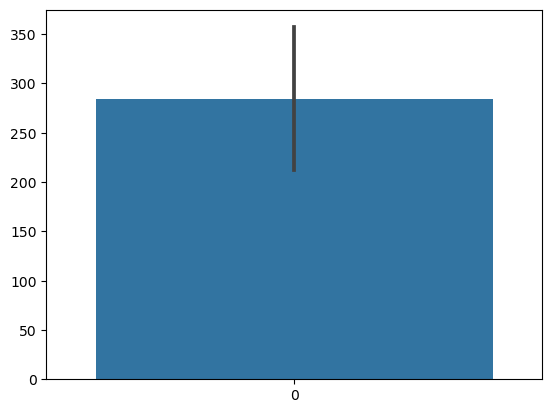

In [11]:
ser=pd.Series(Y)
table= ser.value_counts()
table=table.sort_index()
sns.barplot(table.values)
plt.show()

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.4,random_state=1234)
                                                    
                                                    

In [13]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(341, 30)
(228, 30)
(341,)
(228,)


In [14]:
LL = LogisticRegression(solver='liblinear',max_iter=200)
LL.fit(X_train,Y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [15]:

Y_pred_test = LL.predict(X_test)  # Out-of-sample prediction. 


In [16]:
# Confusion matrix.
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test)
print(conf_mat)

[[139   5]
 [ 12  72]]


In [75]:
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test)
print(conf_mat)

accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
recall=conf_mat[1,1]/(conf_mat[1,1]+conf_mat[1,0])
f1_score = 2 * (precision * recall) / (precision + recall)

print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Precision   = {}'.format(np.round(precision,3)))
print('recall   = {}'.format(np.round(recall,3)))
print('f1 score   = {}'.format(np.round(f1_score,3)))

[[139   5]
 [ 12  72]]
Accuracy    = 0.925
Precision   = 0.935
recall   = 0.857
f1 score   = 0.894


Cutoff(Threshold)

In [80]:
# Alternative way.
accuracy = metrics.accuracy_score(Y_test,Y_pred_test)                      # Alternative way to calculate the accuracy.
sensitivity = metrics.recall_score(Y_test,Y_pred_test)
precision = metrics.precision_score(Y_test,Y_pred_test)
recall = metrics.recall_score(Y_test,Y_pred_test)
f1 = metrics.f1_score(Y_test,Y_pred_test)

print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Precision   = {}'.format(np.round(precision,3)))
print('recall   = {}'.format(np.round(recall,3)))
print('f1  = {}'.format(np.round(f1,3)))


Accuracy    = 0.925
Precision   = 0.935
recall   = 0.857
f1  = 0.894


In [19]:
#testing with Random forest algorithm
from sklearn.ensemble import RandomForestClassifier

In [81]:
RFC=RandomForestClassifier(n_estimators=100, max_depth=5,min_samples_leaf=2,random_state=123)
RFC.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, random_state=123)

In [82]:
Y_pred=RFC.predict(X_test)

In [83]:
# Alternative way.
accuracy = metrics.accuracy_score(Y_test,Y_pred_test)                      # Alternative way to calculate the accuracy.
sensitivity = metrics.recall_score(Y_test,Y_pred_test)
precision = metrics.precision_score(Y_test,Y_pred_test)
recall = metrics.recall_score(Y_test,Y_pred_test)
f1 = metrics.f1_score(Y_test,Y_pred_test)

print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Precision   = {}'.format(np.round(precision,3)))
print('recall   = {}'.format(np.round(recall,3)))
print('f1  = {}'.format(np.round(f1,3)))


Accuracy    = 0.925
Precision   = 0.935
recall   = 0.857
f1  = 0.894


In [22]:
print("Random forest accuracy is " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),4)))

Random forest accuracy is 0.9123


In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
knn_classifier=KNeighborsClassifier(n_neighbors=4)

In [89]:
knn_classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

In [90]:
y_pred_knn=knn_classifier.predict(X_test)

In [100]:
accuracy = metrics.accuracy_score(Y_test,y_pred_knn)                      # Alternative way to calculate the accuracy.
sensitivity = metrics.recall_score(Y_test,y_pred_knn)
precision = metrics.precision_score(Y_test,y_pred_knn)
recall = metrics.recall_score(Y_test,y_pred_knn)
f1 = metrics.f1_score(Y_test,y_pred_knn)

print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Precision   = {}'.format(np.round(precision,3)))
print('recall   = {}'.format(np.round(recall,3)))
print('f1  = {}'.format(np.round(f1,3)))


Accuracy    = 0.917
Precision   = 0.985
recall   = 0.786
f1  = 0.874


In [27]:
print("KNN algorithm accuracy is " + str(np.round(metrics.accuracy_score(Y_test,y_pred_knn),4)))

KNN algorithm accuracy is 0.9167


# Naive bayes Algorithm

In [28]:
from sklearn.naive_bayes import GaussianNB

In [92]:
gnb= GaussianNB()

In [93]:
gnb.fit(X_train,Y_train)

GaussianNB()

In [94]:
y_pred_nb=gnb.predict(X_test)

In [95]:
print("Naive bayes algorithm accuracy is " + str(np.round(metrics.accuracy_score(Y_test,y_pred_nb),4)))

Naive bayes algorithm accuracy is 0.9079


In [101]:
accuracy = metrics.accuracy_score(Y_test,y_pred_nb)                      # Alternative way to calculate the accuracy.
sensitivity = metrics.recall_score(Y_test,y_pred_nb)
precision = metrics.precision_score(Y_test,y_pred_nb)
recall = metrics.recall_score(Y_test,y_pred_nb)
f1 = metrics.f1_score(Y_test,y_pred_nb)

print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Precision   = {}'.format(np.round(precision,3)))
print('recall   = {}'.format(np.round(recall,3)))
print('f1  = {}'.format(np.round(f1,3)))


Accuracy    = 0.908
Precision   = 0.92
recall   = 0.821
f1  = 0.868


In [33]:
from sklearn.tree import DecisionTreeRegressor

In [98]:
regressor=DecisionTreeRegressor()

In [99]:
regressor.fit(X_train,Y_train)

DecisionTreeRegressor()

In [36]:
y_pred_decision=regressor.predict(X_test)

In [37]:
print("Decision tree accuracy is " + str(np.round(metrics.accuracy_score(Y_test,y_pred_decision),4)))

Decision tree accuracy is 0.8904


In [102]:
accuracy = metrics.accuracy_score(Y_test,y_pred_decision)                      # Alternative way to calculate the accuracy.
sensitivity = metrics.recall_score(Y_test,y_pred_decision)
precision = metrics.precision_score(Y_test,y_pred_decision)
recall = metrics.recall_score(Y_test,y_pred_decision)
f1 = metrics.f1_score(Y_test,y_pred_decision)

print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Precision   = {}'.format(np.round(precision,3)))
print('recall   = {}'.format(np.round(recall,3)))
print('f1  = {}'.format(np.round(f1,3)))


Accuracy    = 0.89
Precision   = 0.839
recall   = 0.869
f1  = 0.854


# Descision tree classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
classifier=DecisionTreeClassifier()

In [40]:
classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [41]:
y_pred_class=regressor.predict(X_test)

In [42]:
print("Decision tree accuracy is " + str(np.round(metrics.accuracy_score(Y_test,y_pred_class),4)))

Decision tree accuracy is 0.8904


In [103]:
accuracy = metrics.accuracy_score(Y_test,y_pred_class)                      # Alternative way to calculate the accuracy.
sensitivity = metrics.recall_score(Y_test,y_pred_class)
precision = metrics.precision_score(Y_test,y_pred_class)
recall = metrics.recall_score(Y_test,y_pred_class)
f1 = metrics.f1_score(Y_test,y_pred_class)

print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Precision   = {}'.format(np.round(precision,3)))
print('recall   = {}'.format(np.round(recall,3)))
print('f1  = {}'.format(np.round(f1,3)))

Accuracy    = 0.89
Precision   = 0.839
recall   = 0.869
f1  = 0.854


# ADA Boost

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
base_classifier=DecisionTreeClassifier(max_depth=3)

In [45]:
ada_classifier=AdaBoostClassifier(base_estimator=base_classifier)

In [46]:
ada_classifier.fit(X_train,Y_train)

/usr/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3))

In [47]:
y_pred_ada=ada_classifier.predict(X_test)

In [48]:
print("ADA boost accuracy is " + str(np.round(metrics.accuracy_score(Y_test,y_pred_ada),4)))

ADA boost accuracy is 0.9254


In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
gb_classifier=GradientBoostingClassifier()

In [51]:
gb_classifier.fit(X_train,Y_train)

GradientBoostingClassifier()

In [52]:
y_pred_gboost=gb_classifier.predict(X_test)

In [53]:
print("gradient boosting accuracy is " + str(np.round(metrics.accuracy_score(Y_test,y_pred_gboost),4)))

gradient boosting accuracy is 0.9211


# Visualization of models performance

In [54]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn import metrics


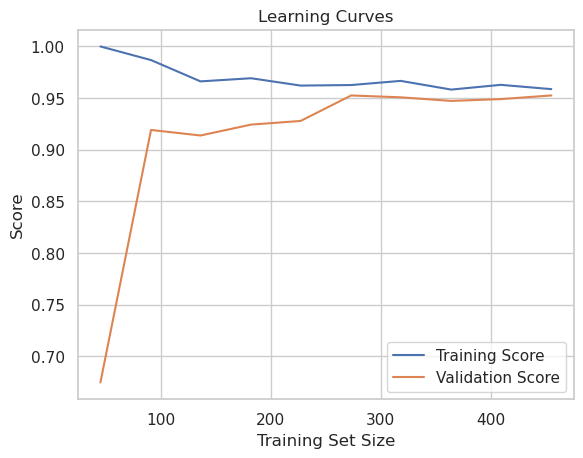

In [62]:
estimator=LL
train_sizes, train_scores, test_scores = learning_curve(estimator, X, Y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()

In [104]:
model_names = ['LL', 'Random forest','KNN','descision tree','naive bays']
accuracy = [0.925 ,0.925 ,0.925,0.89,0.908]
precision = [0.935 ,0.935, 0.935,0.839,0.92]
recall = [0.857,.857,0.857,0.869, 0.821]
f1_score = [0.894,0.894,0.894,0.854,0.868 ]



In [105]:
models_param = {
    'Model': model_names,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score
}
df = pd.DataFrame(models_param)

# Display the DataFrame
print(df)

            Model  Accuracy  Precision  Recall  F1-Score
0              LL     0.925      0.935   0.857     0.894
1   Random forest     0.925      0.935   0.857     0.894
2             KNN     0.925      0.935   0.857     0.894
3  descision tree     0.890      0.839   0.869     0.854
4      naive bays     0.908      0.920   0.821     0.868


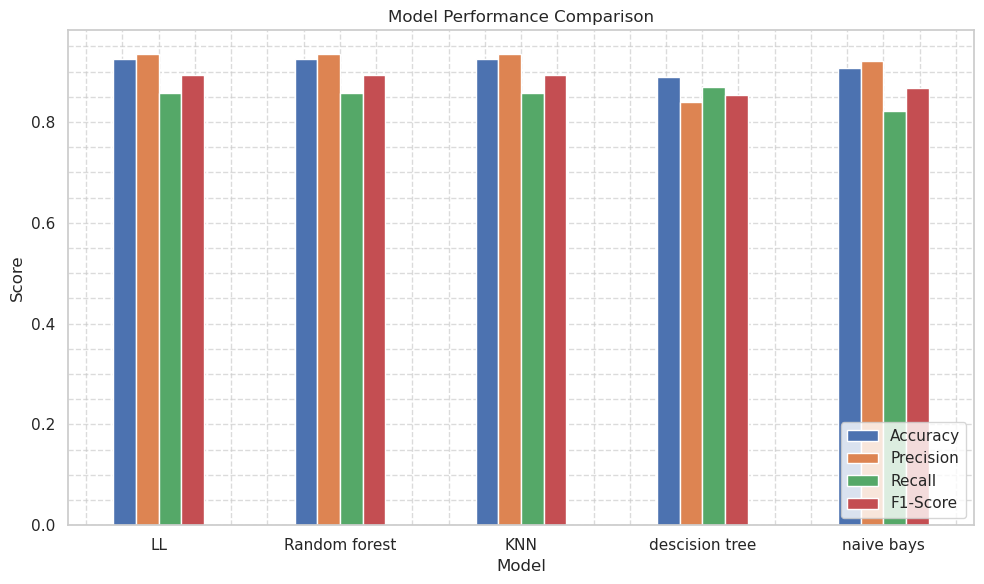

In [110]:
df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.grid(True, linestyle='--', alpha=0.7, which='both')  # Show grid lines for both major and minor ticks
plt.minorticks_on()  # Turn on minor ticks
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Trained all of the given model but only of 5 models performance were visualized 
     we can also conclude that KNN is the best performing among these models as accuracy and precision is higher than that of other model